# Etapa 3
___
## Lucas Chen Alba

## A quantidade de energia elétrica consumida e a renda influenciam na quantidade de CO2 emitidos por uma pessoa?
___

### O problema escolhido consiste em analisar quanto o consumo de energia elétrica per capita e a renda per capita podem se relacionar linearmente com a emissão de CO2 per capita. Traduzindo para a estatística, analisar a inclinação das retas produzidas pela junção dos dados de CO2 com a renda e da CO2 com energia elétrica. Se a inclinação for alta, significa que a variável explicativa em questão.
### A motivação vem de como o consumo de energia elétrica e renda per capita, que estão correlacionados, se relacionam com a emissão do gás CO2 na atmosfera.

### Os databases usados foram de dados coletados no ano de 2011. Site: https://www.gapminder.org/

In [91]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot



import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 5


In [2]:
co2 = pd.read_excel('co2.xlsx', index_col=0)
elec = pd.read_excel('elec.xlsx', index_col=0)
renda = pd.read_excel('renda.xlsx', index_col=0)

In [3]:
#Juntando as três tabelas no para uma planilha unificada

dados = co2.join(elec, how='outer')
dados = dados.join(renda, how='outer')
dados.head()

,co2,elec,renda
Abkhazia,NaN,NaN,NaN
Afghanistan,0.262174,NaN,1637.0
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,1.336544,1800.870627,9374.0
Algeria,3.480977,986.865004,12494.0


In [4]:
dados.shape

(275, 3)

In [5]:
#Retirar NaN de todos os países que não tem algum dos 3 dados no ano de 2011
dados = dados[~np.isnan(dados.co2)]
dados = dados[~np.isnan(dados.renda)]
dados = dados[~np.isnan(dados.elec)]
dados.head()

,co2,elec,renda
Albania,1.336544,1800.870627,9374.0
Algeria,3.480977,986.865004,12494.0
Angola,1.593918,246.660669,7047.0
Argentina,4.466338,2907.176618,15765.0
Armenia,1.364888,1676.060977,6508.0


In [6]:
dados.shape

(127, 3)

___
# Análise descritiva
___

In [7]:
dados.co2.describe()

count    127.000000
mean       5.993800
std        7.122201
min        0.046079
25%        1.377786
50%        4.087687
75%        7.679920
max       40.098333
Name: co2, dtype: float64

In [8]:
dados.renda.describe()

count       127.000000
mean      20681.078740
std       20506.477891
min         632.000000
25%        6487.000000
50%       14660.000000
75%       29885.000000
max      127984.000000
Name: renda, dtype: float64

In [9]:
dados.elec.describe()

count      127.000000
mean      4350.418077
std       6061.729664
min         24.655430
25%        913.326133
50%       2498.172034
75%       5829.382154
max      51439.908691
Name: elec, dtype: float64

___
### Percebe-se que o desvio padrão parece bastante alto nas três variáveis, isso se da à presença de alguns outliers na base de dados, porém eles não influenciaram no resultado final, uma vez que iremos realizar a transformação logarítmica dos dados.
___

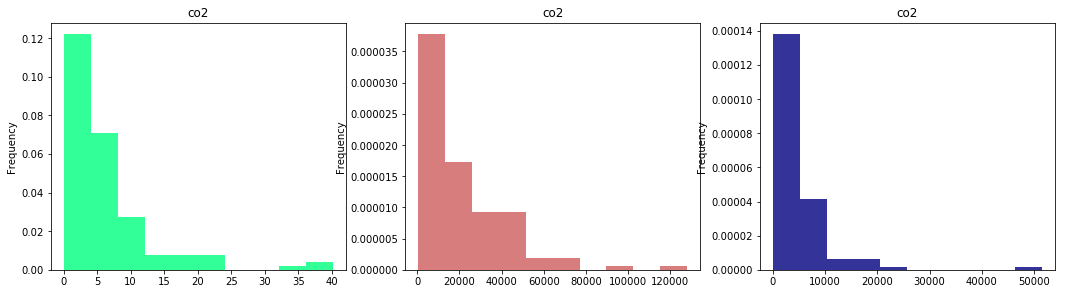

In [10]:
plt.figure(figsize=(18,10))


plt.subplot(2,3,1)
dados.co2.plot.hist(color = "SpringGreen", alpha = 0.8, title = 'co2', normed = 1)

plt.subplot(2,3,2)
dados.renda.plot.hist(color = "IndianRed", alpha = 0.8, title = 'co2', normed = 1)

plt.subplot(2,3,3)
dados.elec.plot.hist(color = "Navy", alpha = 0.8, title = 'co2', normed = 1)

___
### Os gráficos acima indicam que as três variáveis escolhidas parecem assumir uma distribuição exponencial. Por este motivo é utilizado o ajuste abaixo realizando a transformação dos dados para log(dados), pois a curva dos dados originais aproxima-se à uma reta, podendo assim ajustar os dados através do método de regressão.
___

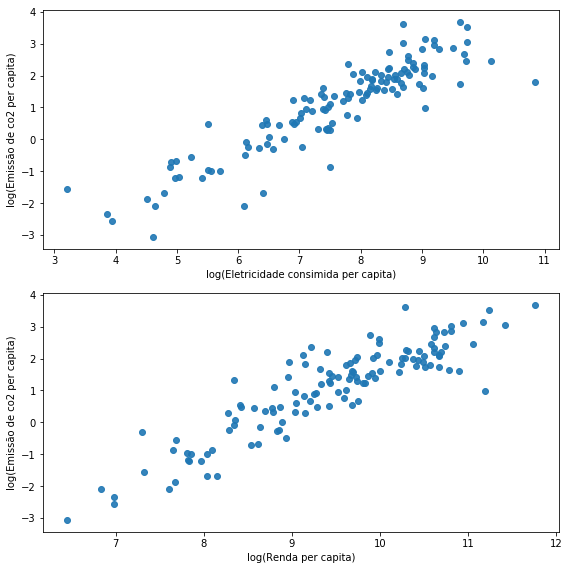

In [11]:
f, ax = plt.subplots(2,figsize=(8,8))
ax[0].scatter(np.log (dados.elec), np.log(dados.co2), alpha=0.9)  # Plot the raw data
ax[0].set_xlabel("log(Eletricidade consimida per capita)")
ax[0].set_ylabel("log(Emissão de co2 per capita)")

ax[1].scatter(np.log(dados.renda), np.log(dados.co2), alpha=0.9)  # Plot the raw data
ax[1].set_xlabel("log(Renda per capita)")
ax[1].set_ylabel("log(Emissão de co2 per capita)")


plt.tight_layout(1)

In [12]:
dados.corr(method = 'pearson')

,co2,elec,renda
co2,1.000000,0.516075,0.784001
elec,0.516075,1.000000,0.661832
renda,0.784001,0.661832,1.000000


In [13]:
dadosln = np.log(dados)
dadosln.corr(method = 'pearson')

,co2,elec,renda
co2,1.000000,0.904968,0.902327
elec,0.904968,1.000000,0.899549
renda,0.902327,0.899549,1.000000


___
### Percebe-se que as correlações não são tão altas quando utilizados os dados originais, principalmente consumo de energia com co2. Porém quando aplicado o log nessas variáveis a correlação torna-se muito mais alta.
___

___
# Regressão
___

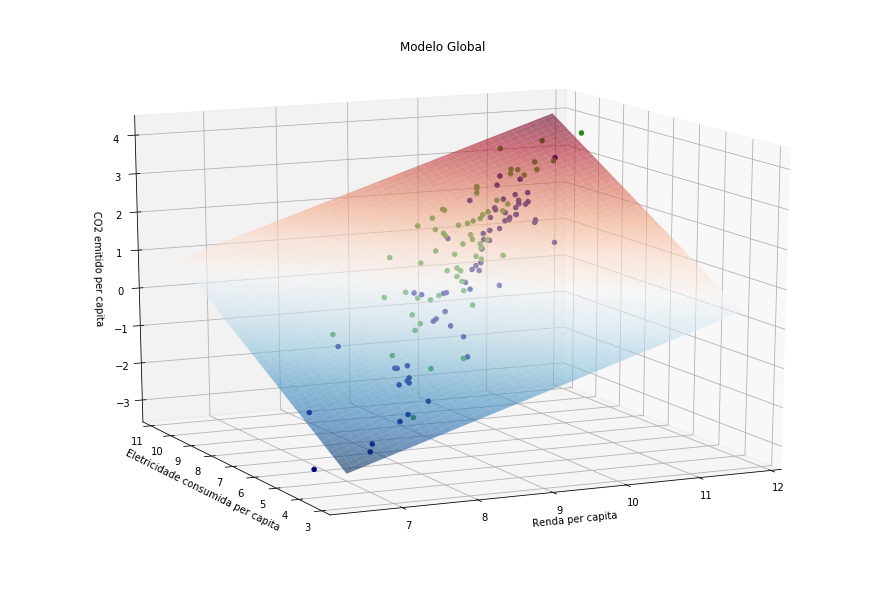

In [17]:
X = dadosln[['renda', 'elec']]
y = dadosln['co2']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.renda.min(), X.renda.max(), 100), np.linspace(X.elec.min(), X.elec.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize = (12, 8))
ax = Axes3D(fig, azim = -115, elev = 15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].renda, X[resid >= 0].elec, y[resid >= 0], c = 'ForestGreen', alpha=1.0, facecolor = 'white')
ax.scatter(X[resid < 0].renda, X[resid < 0].elec, y[resid < 0], c = 'Navy', alpha=1.0)

ax.set_xlabel('Renda per capita')
ax.set_ylabel('Eletricidade consumida per capita')
ax.set_zlabel('CO2 emitido per capita')
ax.set_title('Modelo Global')
plt.show()

Teste de hipóteses para ambas as variáveis:

H0 --> Beta1 ou Beta2 = 0

H1 --> Beta1 ou Beta2 != 0

In [51]:
model = sm.ols(formula='co2 ~ elec + renda', data = dadosln) # Describe Model
results = model.fit() # Fit model
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     380.2
Date:                Sat, 03 Jun 2017   Prob (F-statistic):           1.26e-53
Time:                        11:42:46   Log-Likelihood:                -99.581
No. Observations:                 127   AIC:                             205.2
Df Residuals:                     124   BIC:                             213.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -8.1739      0.502    -16.295      0.0

___
## Interpretação dos parâmetros
### Os coeficientes Beta1 e Beta2 0,4718 e 0,5994 respsctivamente. Como sobre todas as variáveis está sendo aplicado o log, significa que a cada percentual de eletricidade consumida, o CO2 emitido incrementa em 0,47% e 0,59% a cada 1% no aumento da renda.
___

## Avaliação das variáveis via teste de hipóteses
### A Prob (F-statistic) é muito baixa para o teste realizado, indicando que a probabilidade da hipótese nula estar certa é muito baixa (1,26e-53), portanto a rejeitamos. Com isso inferimos que não existe nenhuma variável pouco significativa no modelo, todas são significativas. A hipótese pode ser comprovada a partir do valor-p, valor máximo que pode ser colocado em 'alfa' para continuar rejeitando H0, nesse caso os valores-p para as duas variáveis foi = 0, significando que mesmo com um alfa = 0 rejeitaríamos H0, concluímos que o teste está bastante preciso.
___

___
## Verificando adequação das suposições do modelo e qualidade do ajuste
___

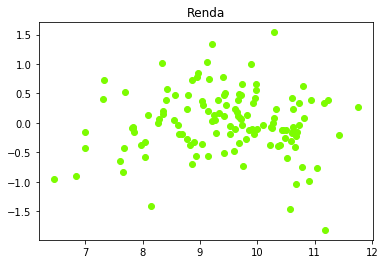

In [59]:
%matplotlib inline
plt.plot(dadosln.renda, results.resid,"o", color="lawnGreen")
plt.title("Renda")
plt.show()

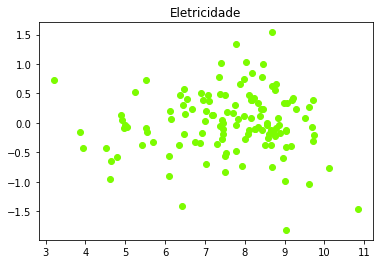

In [58]:
%matplotlib inline
plt.plot(dadosln.elec, results.resid,"o", color = "LawnGreen")
plt.title("Eletricidade")
plt.show()

___
### Pelos gráficos dos resíduos, erros aleatórios dos modelos, a distribuição indica que uma distribuição residual quase ideal, os gráficos aparentam ter alguns outliers.
___

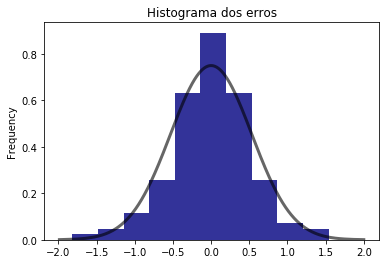

In [66]:
results.resid.plot.hist(color = "Navy", alpha = 0.8, title = 'Histograma dos erros', normed = 1)

x = sorted(stats.norm.rvs(size = 10000, loc = results.resid.mean(), scale = results.resid.std()))
plt.plot(x, stats.norm.pdf(x, loc = results.resid.mean(), scale = results.resid.std()), lw = 3, alpha = 0.6, color = 'Black')

In [68]:
results.resid.describe()

count    1.270000e+02
mean     3.537852e-15
std      5.321197e-01
min     -1.818376e+00
25%     -2.933438e-01
50%     -3.314366e-02
75%      3.547347e-01
max      1.539409e+00
dtype: float64

In [80]:
results.resid = sorted(results.resid)

In [88]:
freqrelat = []
for i in range (127):
    freqrelat.append ((i-0.5)/127)

In [89]:
freqnormalerros = []
for i in results.resid:
    freqnormalerros.append(stats.norm.cdf (i, loc = np.mean(results.resid), scale = np.std(results.resid)))

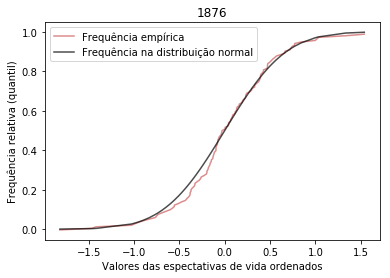

In [92]:
plt.plot (results.resid, freqrelat, lw = 1.5, color = 'IndianRed', alpha = 0.7, label = 'Frequência empírica')
plt.plot (results.resid, freqnormalerros, lw = 1.5, color = 'Black', alpha = 0.7, label = 'Frequência na distribuição normal')

pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Frequência real dos dados, experimental')
plt.title ('1876')

___
### Pode-se verificar a distribuição dos erros, se adequa quase perfeitamente à uma normal, podendo inferir que eles realmente são erros aleatórios.
___

___
### Através do resultado de R^2, um parâmetro que basicamente evidencia o quão bem a variável resposta pode ser descrita pelas variáveis explicativas, basicamente a qualidade do modelo criado. Neste modelo R^2 foi bastante alto, indicando uma alta qualidade.
___

___
# Conclusão
___

### Pode-se concluir que o modelo inferencial foi bem sucedido, obtendo uma precisão alta, de acordo com R^2 (> 0,8), válido nas suposições e com uma probabilidade de H0 estar certa bem baixa. Com isso pode-se dizer que é possível prever o comportamento da variável resposta a partir das duas variáveis explicativas escolhidas. Países com maior consumo de energia e renda per capita produzem no geral mais CO2. Isso deve ocorrer por uma maior quantidade de máquinas e aparelhos que produzem CO2, mas faltou um pouco de pesquisa de background para realizar tal inferência.